In [18]:
test_path = r'C:\Users\User\Desktop\Geek Courses\Big Data\1st qrt\Python для Data Science\Урок 1\test.csv'
train_path = r'C:\Users\User\Desktop\Geek Courses\Big Data\1st qrt\Python для Data Science\Урок 1\train.csv'

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
matplotlib.rcParams.update({'font.size': 14})

In [5]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**до этого сделал некоторые оброботки и выбросы**

In [6]:
df_train = pd.read_csv(train_path)
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.388278,1.894478,56.304146,35.515886,5.879278,8.529278,12.611978,3.989570e+03,0.123326,24.688078,5351.523578,8.043578,1026.118878,1.323378,4.235178,214095.738424
std,43.590613,0.896267,21.068961,18.064280,5.180775,5.246621,6.777489,2.005003e+05,0.357431,17.531777,4007.290195,23.832801,746.856452,1.526979,4.814472,92933.939771
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,20.000000,1.000000,41.771580,25.506959,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153835.918927
50%,35.000000,2.000000,52.509275,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192255.017896
75%,75.000000,2.000000,65.894295,41.421759,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,32.781260,641.065193,638.163193,123.000000,42.000000,117.000000,2.005201e+07,32.781260,74.000000,19083.000000,141.000000,4849.000000,32.781260,32.781260,633233.466570


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(16), object(3)
memory usage: 1.4+ MB


**Обработка выбросов и Построение новых признаков**

In [8]:
df_train['Ecology_2'].value_counts()

B                     9900
A                       97
6.0                      2
32.781260192155735       1
Name: Ecology_2, dtype: int64

In [9]:
df_train['Ecology_2'] = (df_train['Ecology_2'] == 'B').astype(int)
df_train['Ecology_3'] = (df_train['Ecology_3'] == 'B').astype(int)
df_train['Shops_2'] = (df_train['Shops_2'] == 'B').astype(int)

In [10]:
df_train['HouseFloor'].sort_values().unique()

array([  0.        ,   1.        ,   2.        ,   3.        ,
         4.        ,   5.        ,   6.        ,   7.        ,
         8.        ,   9.        ,  10.        ,  11.        ,
        12.        ,  13.        ,  14.        ,  15.        ,
        16.        ,  17.        ,  18.        ,  19.        ,
        20.        ,  21.        ,  22.        ,  23.        ,
        24.        ,  25.        ,  26.        ,  27.        ,
        28.        ,  29.        ,  30.        ,  31.        ,
        32.        ,  32.78126019,  36.        ,  37.        ,
        38.        ,  39.        ,  40.        ,  44.        ,
        45.        ,  47.        ,  48.        ,  99.        ,
       117.        ])

In [11]:
df_train.loc[df_train['HouseFloor'] > 42]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
540,93.0,2.0,60.804544,30.923827,11.0,5.0,45.0,2016.0,0.050900,1,1,43.0,10621.0,1.0,30.0,2.0,3.0,1,213171.135199
2781,76.0,2.0,74.344672,41.044132,5.0,42.0,48.0,2016.0,0.000000,1,1,7.0,1660.0,39.0,1786.0,1.0,5.0,1,411691.504766
3974,20.0,1.0,126.389517,103.637322,14.0,22.0,47.0,2012.0,0.019509,1,1,37.0,7687.0,11.0,176.0,5.0,5.0,1,450706.552655
4323,30.0,1.0,62.110823,52.812128,4.0,31.0,44.0,2009.0,0.000078,1,1,22.0,6398.0,141.0,1046.0,3.0,23.0,1,117647.461002
6131,5.0,1.0,51.944587,48.709601,1.0,6.0,99.0,1977.0,0.150818,1,1,16.0,3433.0,4.0,2643.0,4.0,5.0,1,296127.115515
7728,24.0,3.0,126.621358,62.455481,12.0,22.0,48.0,2011.0,0.111627,1,1,50.0,12238.0,8.0,1970.0,2.0,3.0,1,179396.521035
8599,74.0,2.0,71.747869,74.579809,9.0,5.0,99.0,1977.0,0.075779,1,1,6.0,1437.0,3.0,900.0,0.0,2.0,1,243329.912579
8854,30.0,2.0,65.773749,66.811789,1.0,8.0,117.0,1977.0,0.000078,1,1,22.0,6398.0,141.0,1046.0,3.0,23.0,1,207248.370520


In [12]:
df_train.loc[df_train['HouseFloor'] > 42] = df_train['HouseFloor'].median()

In [13]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

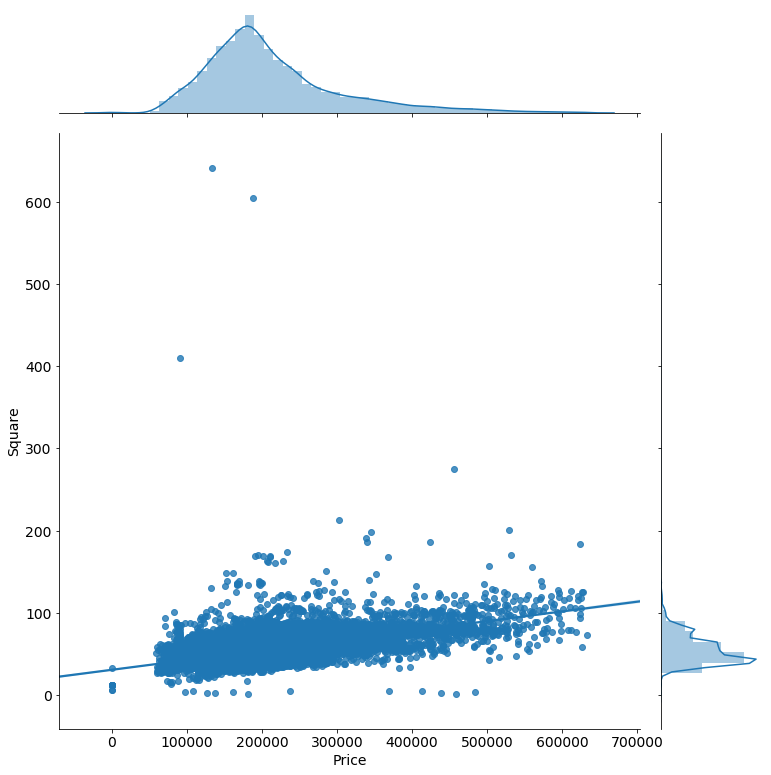

In [14]:
grid = sns.jointplot(df_train['Price'], df_train['Square'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

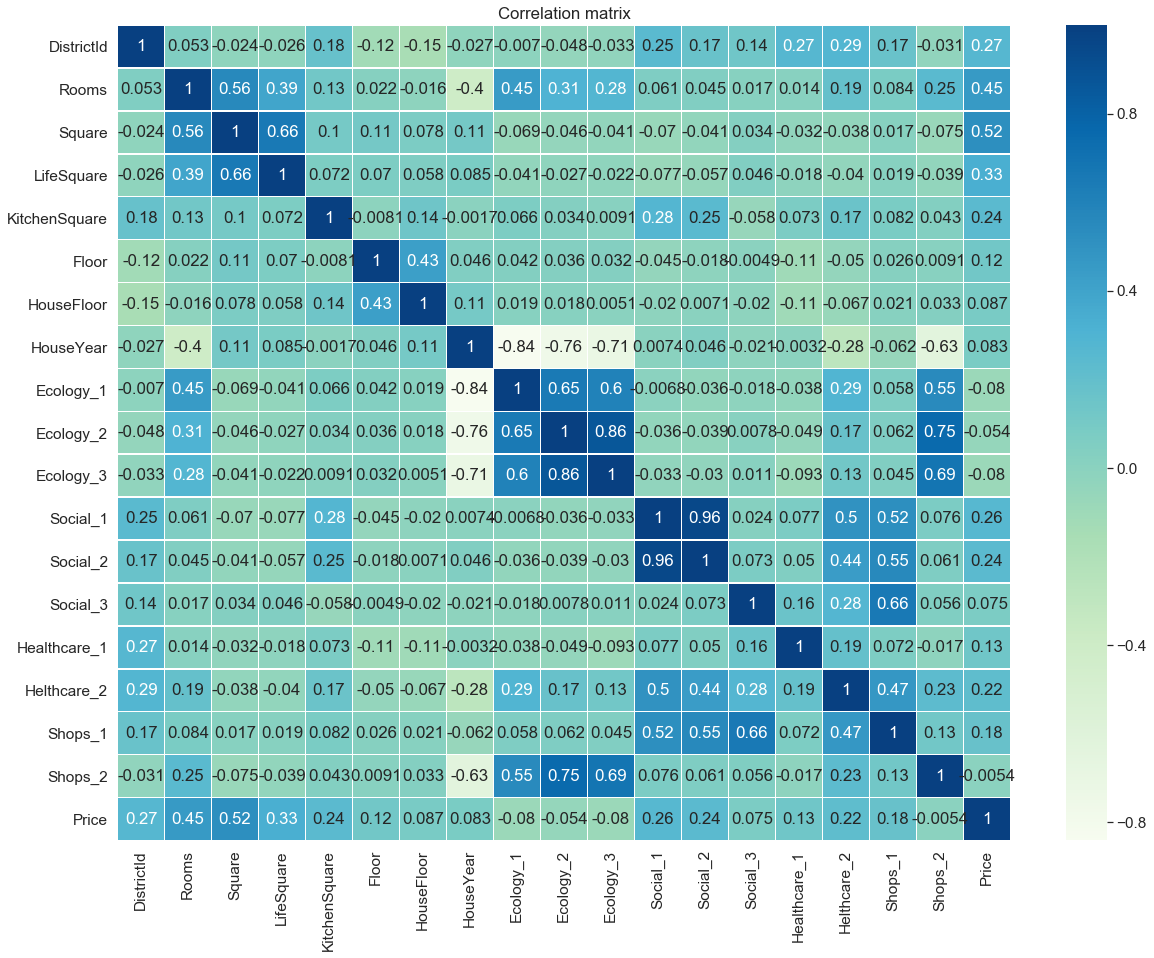

In [15]:
plt.figure(figsize= (20, 15))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [34]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27.0,850
1,1.0,652
2,23.0,565
3,6.0,513
4,9.0,294


In [35]:
df_train = df_train.merge(district_size, on='DistrictId', how='left')
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,1.0,1.0,33.0,7976.0,5.0,900.0,0.0,11.0,1.0,184966.930730,22
1,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,1.0,1.0,46.0,10309.0,1.0,240.0,1.0,16.0,1.0,300009.450063,87
2,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,1.0,1.0,34.0,7759.0,0.0,229.0,1.0,3.0,1.0,220925.908524,174
3,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,1.0,1.0,23.0,5735.0,3.0,1084.0,0.0,5.0,1.0,175616.227217,179
4,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,1.0,1.0,35.0,5776.0,1.0,2078.0,2.0,4.0,1.0,150226.531644,97


In [37]:
df_train['IsDistrictLarge'] = (df_train['DistrictSize'] > 100).astype(int)

In [38]:
med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0.0,1.0,142799.434052
1,0.0,2.0,176210.812334
2,0.0,3.0,300610.359425
3,1.0,1.0,146735.671740
4,1.0,2.0,202706.090239


In [54]:
df_train = df_train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,1.0,...,7976.0,5.0,900.0,0.0,11.0,1.0,184966.930730,22,0,207786.135836
1,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,1.0,...,10309.0,1.0,240.0,1.0,16.0,1.0,300009.450063,87,0,300009.450063
2,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,1.0,...,7759.0,0.0,229.0,1.0,3.0,1.0,220925.908524,174,1,263206.223152
3,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,1.0,...,5735.0,3.0,1084.0,0.0,5.0,1.0,175616.227217,179,1,166809.665642
4,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,1.0,...,5776.0,1.0,2078.0,2.0,4.0,1.0,150226.531644,97,0,158539.052715


In [56]:
df_train.to_csv(train_path, index=False, encoding='utf-8')

In [8]:
df_train = pd.read_csv(train_path)
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.363478,1.903478,56.250572,35.478189,5.883978,8.525578,12.567678,1982.687078,0.133685,0.999600,...,5346.546778,8.019178,1025.169578,1.331778,4.238678,0.926900,213883.816966,242.302800,0.517100,211233.675736
std,43.594784,0.949485,21.079378,18.052221,5.182842,5.228863,6.540474,67.890284,0.510199,0.353854,...,4008.691085,23.756679,747.016320,1.561337,4.813438,0.438834,93069.991173,268.827282,0.499732,76835.797741
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.000000
25%,20.000000,1.000000,41.751942,25.451477,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,...,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153698.297675,55.000000,0.000000,165071.825722
50%,35.000000,2.000000,52.473672,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,1.000000,...,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192113.654461,105.000000,1.000000,195451.277988
75%,75.000000,2.000000,65.885863,41.396901,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,...,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249094.379680,513.000000,1.000000,241068.903045
max,209.000000,32.781260,641.065193,638.163193,123.000000,37.000000,40.000000,2020.000000,32.781260,13.000000,...,19083.000000,141.000000,4849.000000,32.781260,32.781260,13.000000,633233.466570,850.000000,1.000000,624156.003381


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
DistrictId            10000 non-null float64
Rooms                 10000 non-null float64
Square                10000 non-null float64
LifeSquare            10000 non-null float64
KitchenSquare         10000 non-null float64
Floor                 10000 non-null float64
HouseFloor            10000 non-null float64
HouseYear             10000 non-null float64
Ecology_1             10000 non-null float64
Ecology_2             10000 non-null float64
Ecology_3             10000 non-null float64
Social_1              10000 non-null float64
Social_2              10000 non-null float64
Social_3              10000 non-null float64
Healthcare_1          10000 non-null float64
Helthcare_2           10000 non-null float64
Shops_1               10000 non-null float64
Shops_2               10000 non-null float64
Price                 10000 non-null float64
DistrictSize          10000 non-null 

**Отбор признаков**

In [13]:
df_train.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [14]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 
                 'Helthcare_2', 'Shops_1', 'Shops_2', 'DistrictSize', 'IsDistrictLarge', 'MedPriceByDistrict']
target_name = 'Price'

In [15]:
x = df_train[feature_names]
y = df_train[target_name]

**Разбиение на train и test**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=21)

**Построение модели**

In [22]:
rf_model = RandomForestRegressor(random_state=21)

In [23]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=21, verbose=0, warm_start=False)

Train R2:	0.952
Test R2:	0.734


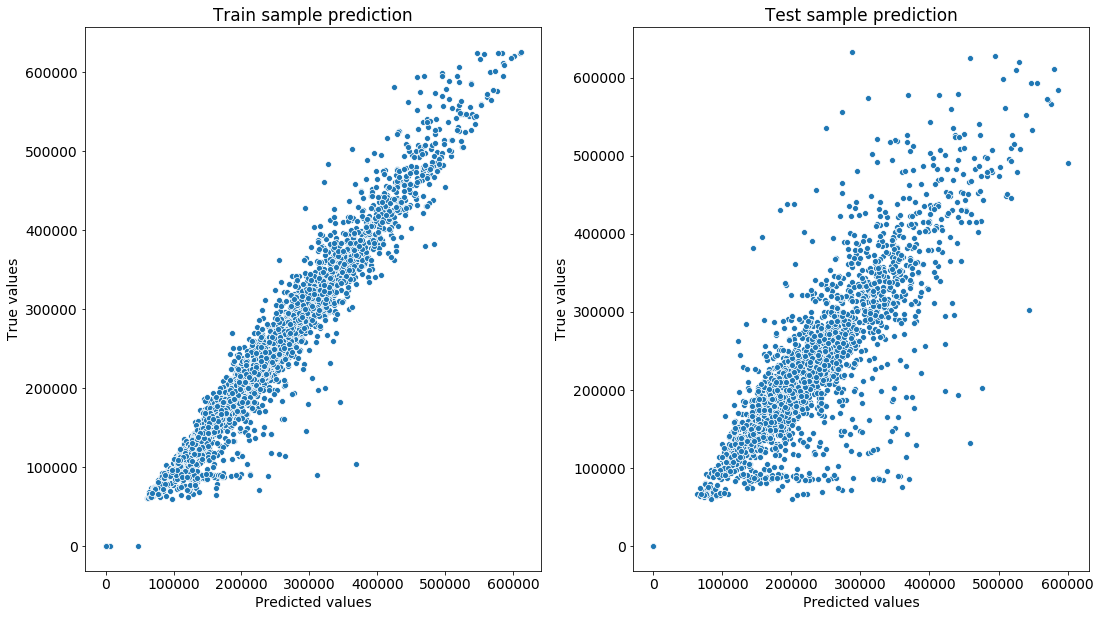

In [24]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Важность признаков**

In [25]:
feature_importances = pd.DataFrame(zip(x_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
20,MedPriceByDistrict,0.606942
2,Square,0.124586
7,HouseYear,0.029092
4,KitchenSquare,0.028551
3,LifeSquare,0.027870
5,Floor,0.025598
6,HouseFloor,0.023908
13,Social_3,0.023108
18,DistrictSize,0.021561
12,Social_2,0.016994


**Обработка с тест**

In [26]:
df_test = pd.read_csv(test_path)

**до этого сделал некоторые оброботки и выбросы**

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null object
dtypes: float64(15), object(3)
memory usage: 703.2+ KB


In [29]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.278200,1.910800,56.442141,35.481904,5.854000,8.631000,12.599400,1983.999400,0.121066,24.929400,5405.59460,8.263600,1029.194600,1.320200,4.243000
std,44.180434,0.840586,19.105138,15.920010,4.854668,5.483252,6.789826,33.581848,0.146050,17.534192,4027.30757,23.863562,766.731842,1.481388,4.777417
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,6.00000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,41.898338,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.00000,0.000000,810.000000,0.000000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.00000,2.000000,900.000000,1.000000,3.000000
75%,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.00000,5.000000,990.000000,2.000000,6.000000
max,212.000000,17.000000,223.453689,303.071094,112.000000,78.000000,99.000000,2020.000000,6.000000,74.000000,19083.00000,141.000000,4849.000000,6.000000,23.000000


**исправление данные где LifeSquare больше чем Square**

In [38]:
df_test.loc[df_test['LifeSquare'] > df_test['Square']].shape

(264, 18)

In [40]:
a = df_test['LifeSquare'].mean()
b = df_test['Square'].mean()
c = a / b
c

0.6286420674697071

In [41]:
df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'LifeSquare'] = df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'LifeSquare'] * 0.63

In [42]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.278200,1.910800,56.442141,34.314146,5.854000,8.631000,12.599400,1983.999400,0.121066,24.929400,5405.59460,8.263600,1029.194600,1.320200,4.243000
std,44.180434,0.840586,19.105138,14.036154,4.854668,5.483252,6.789826,33.581848,0.146050,17.534192,4027.30757,23.863562,766.731842,1.481388,4.777417
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,6.00000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,41.898338,25.096424,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.00000,0.000000,810.000000,0.000000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.00000,2.000000,900.000000,1.000000,3.000000
75%,77.000000,2.000000,66.285129,39.788721,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.00000,5.000000,990.000000,2.000000,6.000000
max,212.000000,17.000000,223.453689,190.934789,112.000000,78.000000,99.000000,2020.000000,6.000000,74.000000,19083.00000,141.000000,4849.000000,6.000000,23.000000


In [43]:
df_test['Ecology_2'] = (df_test['Ecology_2'] == 'B').astype(int)
df_test['Ecology_3'] = (df_test['Ecology_3'] == 'B').astype(int)
df_test['Shops_2'] = (df_test['Shops_2'] == 'B').astype(int)

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int32
Ecology_3        5000 non-null int32
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null int32
dtypes: float64(15), int32(3)
memory usage: 644.6 KB


In [46]:
df_test['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.])

In [47]:
df_test.loc[df_test['HouseFloor'] > 49] = df_test['HouseFloor'].median()

In [48]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.275200,1.912600,56.434997,34.307126,5.854600,8.629800,12.582000,1983.606400,0.123452,0.992400,0.972200,24.931400,5405.471200,8.2658,1029.017000,1.32260,4.245400,0.919800
std,44.182593,0.852471,19.115076,14.038536,4.855242,5.481858,6.678937,43.651898,0.222602,0.184253,0.231166,17.532147,4027.463408,23.8634,766.864607,1.48895,4.778299,0.316525
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.0000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,41.891450,25.087180,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.0000,810.000000,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.0000,900.000000,1.00000,3.000000,1.000000
75%,77.000000,2.000000,66.285129,39.783629,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.0000,990.000000,2.00000,6.000000,1.000000
max,212.000000,17.000000,223.453689,190.934789,112.000000,78.000000,48.000000,2020.000000,12.000000,12.000000,12.000000,74.000000,19083.000000,141.0000,4849.000000,12.00000,23.000000,12.000000


In [50]:
district_size = df_test['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27.0,390
1,1.0,344
2,23.0,264
3,6.0,258
4,9.0,132


In [62]:
df_test = df_test.merge(district_size, on='DistrictId', how='left')
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,58.0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,1.0,1.0,11.0,2748.0,1.0,900.0,0.0,0.0,1.0,91
1,74.0,2.0,69.263183,32.925087,1.0,6.0,1.0,1977.0,0.075779,1.0,1.0,6.0,1437.0,3.0,900.0,0.0,2.0,1.0,61
2,190.0,1.0,13.597819,10.047395,12.0,2.0,5.0,1909.0,0.000000,1.0,1.0,30.0,7538.0,87.0,4702.0,5.0,5.0,1.0,2
3,47.0,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,1.0,1.0,23.0,4583.0,3.0,900.0,3.0,3.0,1.0,49
4,27.0,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,1.0,1.0,2.0,629.0,1.0,900.0,0.0,0.0,0.0,390


In [63]:
df_test['IsDistrictLarge'] = (df_test['DistrictSize'] > 100).astype(int)

In [74]:
med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0.0,1.0,142799.434052
1,0.0,2.0,176210.812334
2,0.0,3.0,300610.359425
3,1.0,1.0,146735.671740
4,1.0,2.0,202706.090239


In [75]:
df_test = df_test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,58.0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,1.0,...,11.0,2748.0,1.0,900.0,0.0,0.0,1.0,91,0,166809.665642
1,74.0,2.0,69.263183,32.925087,1.0,6.0,1.0,1977.0,0.075779,1.0,...,6.0,1437.0,3.0,900.0,0.0,2.0,1.0,61,0,242733.478471
2,190.0,1.0,13.597819,10.047395,12.0,2.0,5.0,1909.0,0.000000,1.0,...,30.0,7538.0,87.0,4702.0,5.0,5.0,1.0,2,0,NaN
3,47.0,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,1.0,...,23.0,4583.0,3.0,900.0,3.0,3.0,1.0,49,0,222227.584211
4,27.0,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,1.0,...,2.0,629.0,1.0,900.0,0.0,0.0,0.0,390,1,118327.090620


In [79]:
df_test.loc[df_test['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = df_test['MedPriceByDistrict'].median()

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
DistrictId            5000 non-null float64
Rooms                 5000 non-null float64
Square                5000 non-null float64
LifeSquare            5000 non-null float64
KitchenSquare         5000 non-null float64
Floor                 5000 non-null float64
HouseFloor            5000 non-null float64
HouseYear             5000 non-null float64
Ecology_1             5000 non-null float64
Ecology_2             5000 non-null float64
Ecology_3             5000 non-null float64
Social_1              5000 non-null float64
Social_2              5000 non-null float64
Social_3              5000 non-null float64
Healthcare_1          5000 non-null float64
Helthcare_2           5000 non-null float64
Shops_1               5000 non-null float64
Shops_2               5000 non-null float64
DistrictSize          5000 non-null int64
IsDistrictLarge       5000 non-null int32
MedPriceByDistric

In [83]:
df_test.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [84]:
df_test.to_csv(test_path, index=False, encoding='utf-8')

In [87]:
test_feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 
                 'Helthcare_2', 'Shops_1', 'Shops_2', 'DistrictSize', 'IsDistrictLarge']
test_target_name = 'MedPriceByDistrict'

In [88]:
x2 = df_test[test_feature_names]
y2 = df_test[test_target_name]

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2)

In [90]:
rf_model_2 = RandomForestRegressor()

In [91]:
rf_model_2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Train R2:	0.973
Test R2:	0.83


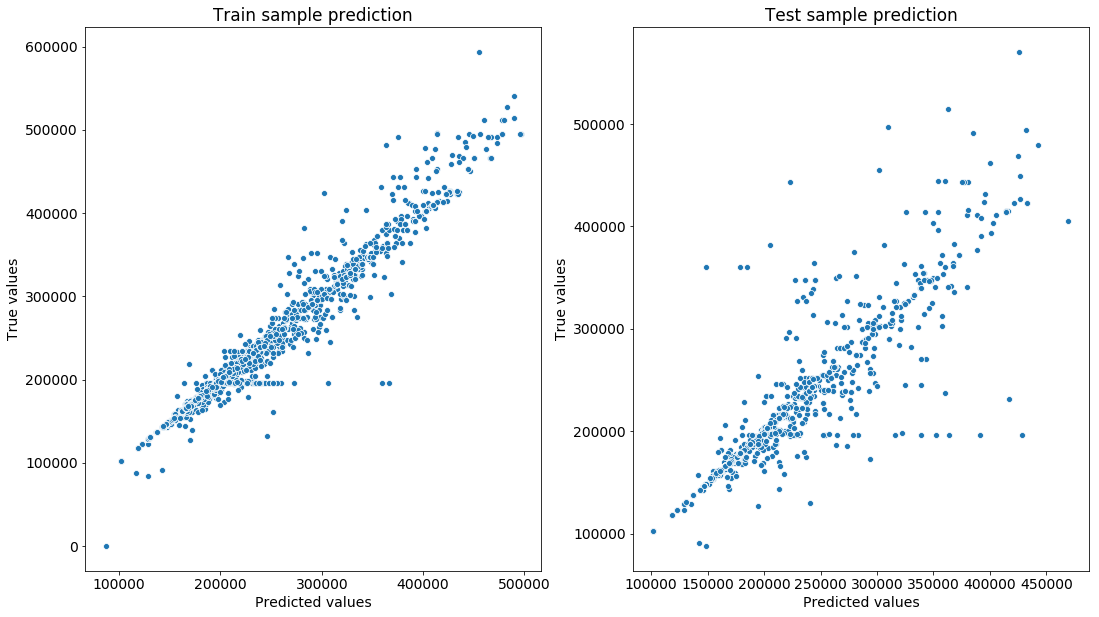

In [92]:
y2_train_preds = rf_model_2.predict(x_train)
y2_test_preds = rf_model_2.predict(x_test)

evaluate_preds(y_train, y2_train_preds, y_test, y2_test_preds)

In [129]:
df_test.to_csv(test_path, index=False, encoding='utf-8')

In [144]:
SShirkin_predictions.to_csv('SShirkin_predictions', index=False, encoding='utf-8')

In [4]:
SShirkin_predictions = pd.read_csv('SShirkin_predictions')
test_original = pd.read_csv('test_original.csv')

In [15]:
Id = test_original['Id']
Id

0         725
1       15856
2        5480
3       15664
4       14275
5        7633
6       13329
7        5502
8        4220
9       11538
10      15975
11       3310
12       9286
13      11260
14       5214
15      11307
16      13543
17        615
18       3495
19       2321
20      12046
21      16688
22      12694
23        783
24       8968
25      13454
26      12190
27      11160
28      10291
29        891
        ...  
4970     1740
4971     3450
4972    16064
4973     1804
4974     5296
4975     5346
4976     4723
4977      417
4978    15756
4979    14090
4980    14778
4981     2560
4982    12920
4983     8249
4984     7125
4985    11732
4986    13365
4987     5361
4988    15937
4989     2591
4990    15706
4991     2105
4992     7220
4993    14562
4994     6836
4995     8180
4996     4695
4997     5783
4998     4780
4999    12504
Name: Id, Length: 5000, dtype: int64

In [37]:
SShirkin_predictions = pd.DataFrame({'Id': test_original['Id'], 
                          'Price': df_test['MedPriceByDistrict']},
                         columns=['Id', 'Price'])
SShirkin_predictions.head()

,Id,Price
0,725,166809.665642
1,15856,242733.478471
2,5480,196094.775997
3,15664,222227.584211
4,14275,118327.090620


In [40]:
SShirkin_predictions.to_csv('SShirkin_predictions.csv', index=False, encoding='utf-8')